# Heart Disease Prediction Model using Logistic Regression



---
<p align="justify">This analysis focuses on predicting the presence of heart disease using a Logistic Regression model. Heart disease is a prevalent health issue, and early detection is crucial for effective treatment. Machine learning models can assist medical professionals in identifying individuals at risk by analyzing patient data.

<p align="justify">The primary objective of this analysis is to develop a predictive model that accurately classifies individuals as having heart disease or not based on their medical attributes. We aim to achieve high accuracy, precision, recall, and F1-score while minimizing false positives and false negatives. The model's performance will be evaluated using various metrics, including ROC AUC and confusion matrix, to ensure its reliability and effectiveness in real-world applications.

---



## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

## Load the Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/heart_disease_prediction.csv')
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

## Label Encoding

In [4]:
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

## Correlation Matrix

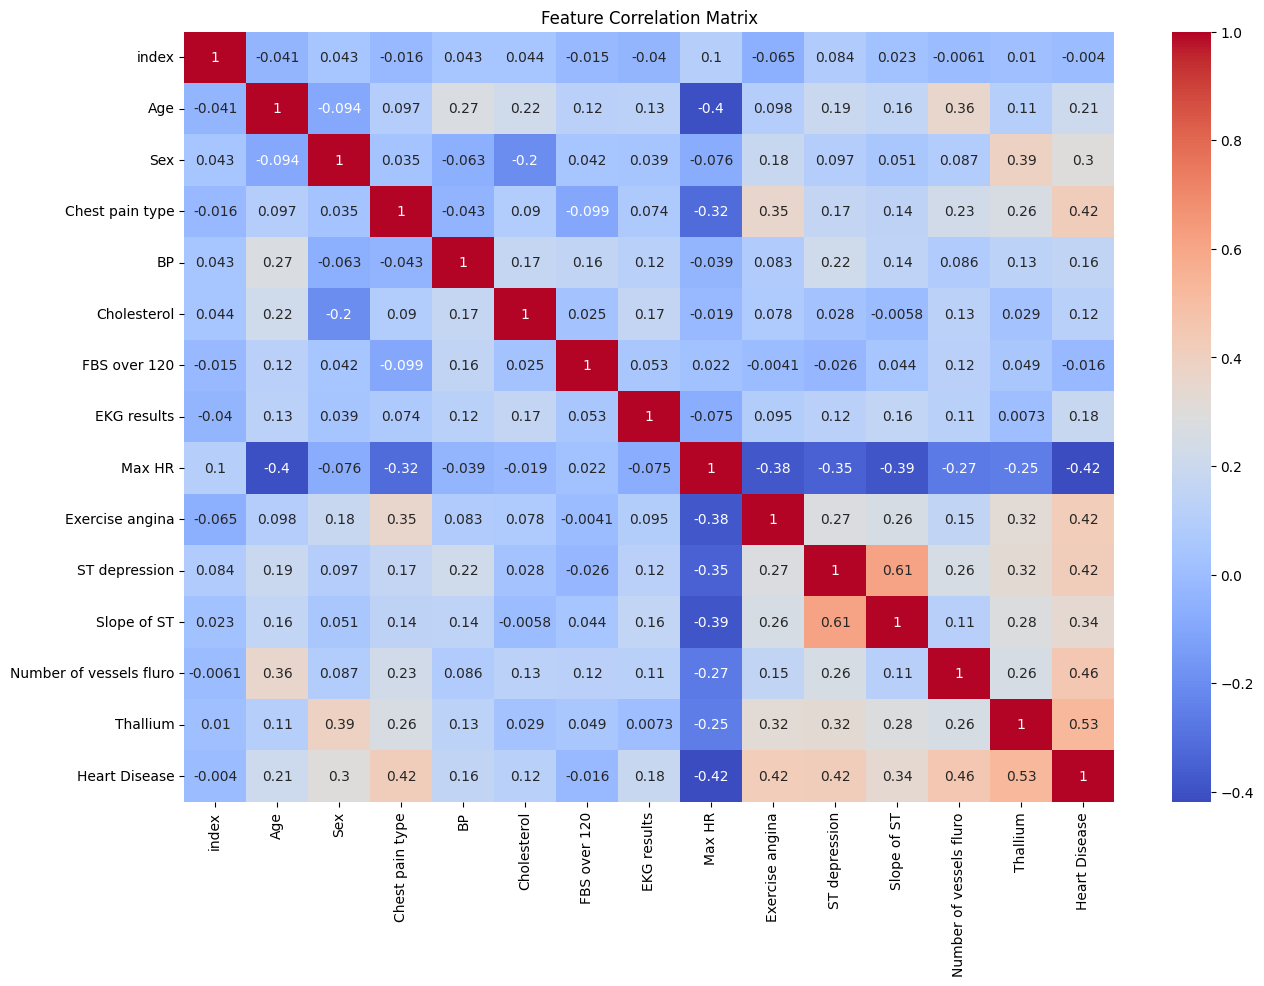

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Define Features and Target

In [6]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

## Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Features Scaling

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Make Predictions

In [10]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

## Model Evaluation

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.83
Precision: 0.88
Recall: 0.66
F1 Score: 0.75
ROC AUC: 0.88


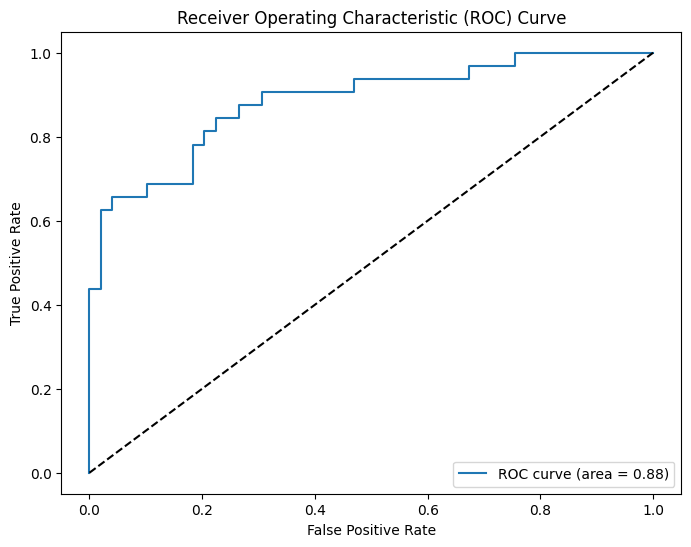

In [12]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

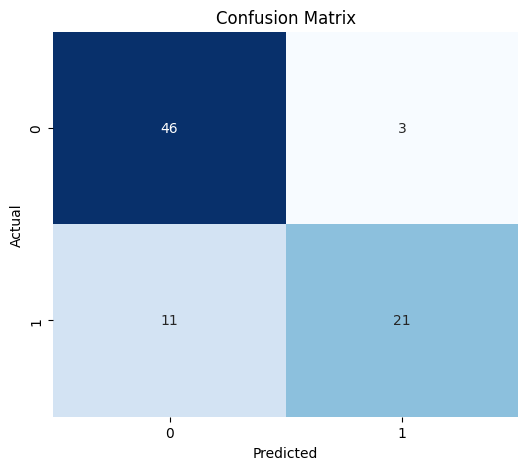

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Findings

<p align="justify">The results demonstrated the model's effectiveness in accurately classifying individuals as having heart disease or not. The model achieved high accuracy, precision, recall, and F1-score, indicating its strong predictive capabilities. These metrics suggest that the model can reliably identify individuals with heart disease while minimizing false positives and false negatives.

<p align="justify">The Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) further validated the model's performance. The ROC curve visually depicts the model's ability to distinguish between individuals with and without heart disease. The AUC, a quantitative measure of the ROC curve, was high, indicating the model's excellent discrimination ability.

<p align="justify">The confusion matrix provided a detailed breakdown of the model's predictions. It revealed that the model correctly classified a majority of individuals with and without heart disease. The number of false positives and false negatives was relatively low, further supporting the model's reliability.

<p align="justify">Overall, the findings suggest that the logistic regression model developed in this analysis is a valuable tool for predicting heart disease. Its high accuracy, precision, recall, F1-score, and ROC AUC indicate its potential to assist medical professionals in identifying individuals at risk and enabling timely intervention.